# Introduction to Scikit-learn

This Notebook demonstrates some of the most useful functions of the beautiful Scikit Learn Library

What we are going to cover:
* an end to end scikit learn workflow
* get ready data
* choose the right estimator/algorithmn for our problems
* fit the model\algorithm\estimator and use it to make predictions on our data
* evaluating our model
* saving and load a trained model
* putting it all together

## 0. An end to end Scikit learn Worflow

In [1]:
# Get the data ready
import pandas as pd
heart_disease= pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [2]:
# Create x (Feature Matrix)
x=heart_disease.drop("target",axis=1)

#Create y (labels)
y=heart_disease["target"]

In [3]:
# Choose the right model and hyperparameter
from sklearn.ensemble import RandomForestClassifier #For ex
clf=RandomForestClassifier()

#We will take the default hyperparameter
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [4]:
# Fit the model to the tarining data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2)

In [5]:
clf.fit(x_train,y_train);

In [6]:
# Make a prediction
import numpy as np #We need to make a numpy array
y_preds=clf.predict(x_test)
y_preds

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0], dtype=int64)

In [7]:
y_test

211    0
128    1
103    1
265    0
293    0
      ..
180    0
66     1
10     1
294    0
224    0
Name: target, Length: 61, dtype: int64

In [8]:
# Evalutate a model
clf.score(x_train,y_train) #1.0 is maximum score

1.0

In [9]:
clf.score(x_test,y_test)

0.8852459016393442

In [10]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.82      0.96      0.89        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.89        61



In [11]:
confusion_matrix(y_test,y_preds)

array([[27,  6],
       [ 1, 27]], dtype=int64)

In [12]:
accuracy_score(y_test,y_preds)

0.8852459016393442

In [13]:
# Improve model 
# Try different amount of n_estimators

np.random.seed(42)
for i in range(10,100,10):
    print(f"Trying model with {i} estimators.. ")
    clf= RandomForestClassifier(n_estimators=i).fit(x_train,y_train)
    print(f"Model accuracy on test set: {clf.score(x_test,y_test) *100:2f}%")
    print()

Trying model with 10 estimators.. 
Model accuracy on test set: 83.606557%

Trying model with 20 estimators.. 
Model accuracy on test set: 91.803279%

Trying model with 30 estimators.. 
Model accuracy on test set: 86.885246%

Trying model with 40 estimators.. 
Model accuracy on test set: 88.524590%

Trying model with 50 estimators.. 
Model accuracy on test set: 90.163934%

Trying model with 60 estimators.. 
Model accuracy on test set: 88.524590%

Trying model with 70 estimators.. 
Model accuracy on test set: 85.245902%

Trying model with 80 estimators.. 
Model accuracy on test set: 86.885246%

Trying model with 90 estimators.. 
Model accuracy on test set: 86.885246%



In [14]:
# Save model and load
import pickle
pickle.dump(clf,open("random_first_model.pkl","wb"))

In [15]:
loaded_model=pickle.load(open("random_first_model.pkl", "rb"))
loaded_model.score(x_test,y_test)

0.8688524590163934

In [16]:
#### This the normal worflow
#### We will break this off one by one
#### First standard imports
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as py

### 1. Getting your data ready

3 Main things to do:

    1. Split the data into features and labels (usually x and y)
    
    2. Filling (also called imputing) or disregarding missing values
    
    3. Converting non numerical values to numerical values (also called feature encoding)
    

In [17]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
x=heart_disease.drop("target",axis=1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
y= heart_disease["target"]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [20]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) #80% training data

In [21]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((242, 13), (242,), (61, 13), (61,))

#### 1.1 Make sure the data is all numerical


In [22]:
car_sales= pd.read_csv("car-sales-extended.csv")
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [23]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [24]:
# Split the data into x and y
x= car_sales.drop("Price", axis=1)
y= car_sales["Price"]
x_train,x_test, y_train,y_test=train_test_split(x,y,test_size=0.2)

In [25]:
# Turn the categories into numbers (Option 1)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour", "Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder="passthrough")
transformed_x=transformer.fit_transform(x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [26]:
# Option 2
dummies=pd.get_dummies(car_sales[["Make","Colour","Doors"]])
dummies.astype(int)

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [27]:
# Build Machine Learning Model
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
x_train,x_test, y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.3235867221569877

#### 1.2 What if there are missing values?

1. Fill them with some value (also known as imputation)
2. Remove the sample with missing data altogether

In [28]:
car_sales_missing= pd.read_csv("car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [29]:
# Check if there is missing data
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [30]:
# Convert to Numeric data 
x= car_sales_missing.drop("Price",axis=1)
y=car_sales_missing["Price"]
categorical_features=["Make","Colour", "Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder="passthrough")
transformed_x=transformer.fit_transform(car_sales_missing)
transformed_x

<1000x17 sparse matrix of type '<class 'numpy.float64'>'
	with 5000 stored elements in Compressed Sparse Row format>

#### If data is missing
#### Option 1 (Fill data with pandas)


In [31]:
#Fill the MAKE Column
car_sales_missing["Make"].fillna("missing", inplace=True)

#Fill the COLOUR Column
car_sales_missing["Colour"].fillna("missing",inplace=True)

#Fill the ODOMETER Column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace=True)

#Fill the DOORS Column
car_sales_missing["Doors"].fillna(4,inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2308\2790668940.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  car_sales_missing["Make"].fillna("missing", inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_2308\2790668940.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [32]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [33]:
# Remove the missing PRICE rows
car_sales_missing.dropna(inplace=True)


In [34]:
len(car_sales_missing)

950

In [35]:
# We lost 50 data samples from the data

In [36]:
x=car_sales_missing.drop('Price',axis=1)
y=car_sales_missing['Price']

#### Option 2 - Fill missing values with Scikit-Learn


In [37]:
car_sales_missing= pd.read_csv("car-sales-extended-missing-data.csv")

In [38]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [39]:
# Drop the rows with no labels
car_sales_missing.dropna(subset=["Price"],inplace=True)

In [40]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [41]:
# Fill missing data with Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill Categorical values with missing and numerical values with mean (like pandas)
cat_imputer= SimpleImputer(strategy="constant",fill_value="missing")
door_imputer= SimpleImputer(strategy="constant",fill_value=4)
num_imputer= SimpleImputer(strategy="mean")

#Define Columns
cat_features= ["Make","Colour"]
door_features=["Doors"]
num_features= ["Odometer (KM)"]

# Create an imputer (something that fills data)
imputer=ColumnTransformer([("cat_imputer",cat_imputer, cat_features),
                           ("door_imputer",door_imputer,door_features),
                           ("num_imputer",num_imputer,num_features)])

# Transform the Data
filled_x=imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [42]:
car_sales_filled=pd.DataFrame(filled_x,
                              columns=["Make", "Colour","Doors","Odometer (KM)"])

In [43]:
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,missing,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [44]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [45]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features=["Make","Colour", "Doors"]
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder="passthrough")
transformed_x=transformer.fit_transform(car_sales_filled)
transformed_x
y

0      15323.0
1      19943.0
2      28343.0
3      13434.0
4      14043.0
        ...   
995    32042.0
996     5716.0
997    31570.0
998     4001.0
999    12732.0
Name: Price, Length: 950, dtype: float64

In [46]:
# Now we have data with 0 missing values
# Lets fit a model
np.random.seed(41)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(transformed_x, y,test_size=0.2)
model= RandomForestRegressor(n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.25121298528321323

### Choosing the right estimator/algorithm for your problem

Somethings to note:
* Sklearn refers to ML models,algorithms as estimators
* Classification problem- predicting a category (heart disease or not)
      * Sometimes you will see 'clf' (short for classification) used as a classification estimator
* Regression problem- Predicting a numerical value (selling price of a car)

If working on a ML problem and using Sklearn and not sure what model to use, refer to this
![](ml_map.png)

#### 2.1 Picking a ML Model for a regression problem

Lets use the California housing dataset.


In [47]:
# Get the dataset
from sklearn.datasets import fetch_california_housing
housing= fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [48]:
housing_df= pd.DataFrame(housing["data"],columns=housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [49]:
housing_df["target"]=housing["target"]
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [50]:
#Import the data
from sklearn.linear_model import Ridge

#Setup Random seed
np.random.seed(41)

# Create the data
x=housing_df.drop("target",axis=1)
y=housing_df["target"]

#Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Instantiate and fit the model
model=Ridge()
model.fit(x_train,y_train)

#check model on test set

model.score(x_test,y_test)

0.595086432930197

In [51]:
#Import the data
from sklearn.linear_model import Lasso

#Setup Random seed
np.random.seed(41)

# Create the data
x=housing_df.drop("target",axis=1)
y=housing_df["target"]

#Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Instantiate and fit the model
model=Lasso()
model.fit(x_train,y_train)

#check model on test set

model.score(x_test,y_test)

0.2819019592267683

###### IF RIDGE DIDNT WORK ON OUR NEEDS

In [52]:
#Import the data
from sklearn.linear_model import SGDRegressor

#Setup Random seed
np.random.seed(41)

# Create the data
x=housing_df.drop("target",axis=1)
y=housing_df["target"]

#Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Instantiate and fit the model
model=SGDRegressor()
model.fit(x_train,y_train)

#check model on test set

model.score(x_test,y_test)

-9.514667286886823e+29

In [53]:
#Import the data
from sklearn.linear_model import ElasticNet

#Setup Random seed
np.random.seed(41)

# Create the data
x=housing_df.drop("target",axis=1)
y=housing_df["target"]

#Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Instantiate and fit the model
model=ElasticNet()
model.fit(x_train,y_train)

#check model on test set

model.score(x_test,y_test)

0.41672253843467433

In [54]:
#Import the data
from sklearn.ensemble import GradientBoostingRegressor
# (An enemble model is combination of smaller models to try and make better predictions than just a singular model)

#Setup Random seed
np.random.seed(41)

# Create the data
x=housing_df.drop("target",axis=1)
y=housing_df["target"]

#Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Instantiate and fit the model
model=GradientBoostingRegressor()
model.fit(x_train,y_train)

#check model on test set

model.score(x_test,y_test)

0.7831226404924562

In [55]:
#Import the data
from sklearn.ensemble import RandomForestRegressor
# (An enemble model is combination of smaller models to try and make better predictions than just a singular model)

#Setup Random seed
np.random.seed(41)

# Create the data
x=housing_df.drop("target",axis=1)
y=housing_df["target"]

#Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Instantiate and fit the model
model=RandomForestRegressor()
model.fit(x_train,y_train)

#check model on test set

model.score(x_test,y_test)

0.8101560950661048

#### 2.2 Picking Ml Model for a Classification Problem

In [56]:
heart_disease=pd.read_csv("heart-disease.csv")

In [57]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [58]:
heart_disease_df=pd.DataFrame(heart_disease)

In [59]:
heart_disease_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [60]:
#Import the model as per the map
from sklearn.svm import LinearSVC

#Setup Random seed
np.random.seed(41)

# Create the data
x=heart_disease_df.drop("target",axis=1)
y=heart_disease_df["target"]

#Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Instantiate and fit the model
model=LinearSVC()
model.fit(x_train,y_train)

#check model on test set
model.score(x_test,y_test)

0.7868852459016393

In [61]:
# If this doesnt work then

from sklearn.ensemble import RandomForestClassifier

#Setup Random seed
np.random.seed(42)

# Create the data
x=heart_disease_df.drop("target",axis=1)
y=heart_disease_df["target"]

#Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Instantiate and fit the model
model=RandomForestClassifier()
model.fit(x_train,y_train)

#check model on test set
model.score(x_test,y_test)

# WE CAN SEE IMPROVEMENT

0.8524590163934426

### 3. Fit the model on our data and use it to make predictions

#### 3.1 Fitting the model to the data

Different names for:
* x=features,feature variables,data
* y=labels,targets,target variables

In [62]:
from sklearn.ensemble import RandomForestClassifier

#Setup Random seed
np.random.seed(42)

# Create the data
x=heart_disease_df.drop("target",axis=1)
y=heart_disease_df["target"]

#Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Instantiate the model
model=RandomForestClassifier()

# Fit the model (Training the Machine Learning Model )
model.fit(x_train,y_train)

#check model on test set (Use the patterns the model has leaned)
model.score(x_test,y_test)


0.8524590163934426

In [63]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [64]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

#### 3.2 Make predictions using a ML Model

2 ways to make predictions
1. "predict()"
2. 'predict_proba()'

In [65]:
# Using a trained model to make predictions

model.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [66]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [67]:
# Comapare predictions to Truth labels to evaluate the model
y_preds=model.predict(x_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

##### Make Predictions with predict_proba()


In [69]:
# predict_proba() returns probabilities of a classification label
model.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [70]:
# lets predict() on the same data
model.predict(x_test[:5])

array([0, 1, 1, 0, 1], dtype=int64)

predict() can also be used on regression model

In [71]:
#Import the data
from sklearn.ensemble import RandomForestRegressor
# (An enemble model is combination of smaller models to try and make better predictions than just a singular model)

#Setup Random seed
np.random.seed(41)

# Create the data
x=housing_df.drop("target",axis=1)
y=housing_df["target"]

#Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Instantiate and fit the model
model=RandomForestRegressor()
model.fit(x_train,y_train)

# Make predictions 
y_preds=model.predict(x_test)

In [72]:
y_preds[:5]

array([1.10843  , 3.7571323, 1.60496  , 2.21558  , 0.91342  ])

In [73]:
np.array(y_test[:5])

array([1.194, 1.67 , 1.593, 2.028, 0.703])

In [74]:
# Compare predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

0.3221156207364343

 This means on average our predictions are 0.32 different than our actual value

### 4. Evaluating a model

3 ways to Sklearn models
1. estimators built in 'score()' method
2. the 'scoring' parameter
3. Problem specific metric functions


#### 4.1 Evaluating a model with score() method

In [75]:
from sklearn.ensemble import RandomForestClassifier

#Setup Random seed
np.random.seed(42)

# Create the data
x=heart_disease_df.drop("target",axis=1)
y=heart_disease_df["target"]

#Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Instantiate and fit the model
model=RandomForestClassifier()

# Fit the model
model.fit(x_train,y_train)



RandomForestClassifier()

In [76]:
# The highest value for the score () method is 1.0, the lowest is 0.0
## The score here is 100% because the model is already exposed to y_train
model.score(x_train,y_train)

1.0

In [77]:
model.score(x_test,y_test)

0.8524590163934426

Lets use score() on our regression problem

In [78]:
#Import the data
from sklearn.ensemble import RandomForestRegressor

#Setup Random seed
np.random.seed(41)

# Create the data
x=housing_df.drop("target",axis=1)
y=housing_df["target"]

#Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Instantiate and fit the model
model=RandomForestRegressor()
model.fit(x_train,y_train)

#check model on test set

model.score(x_test,y_test)

0.8101560950661048

### 4.2 Evaluating a model using the scoring parameter

In [79]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

#Setup Random seed
np.random.seed(42)

# Create the data
x=heart_disease_df.drop("target",axis=1)
y=heart_disease_df["target"]

#Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Instantiate and fit the model
model=RandomForestClassifier()

# Fit the model
model.fit(x_train,y_train)

RandomForestClassifier()

In [80]:
model.score(x_test,y_test)

0.8524590163934426

In [81]:
cross_val_score(model,x,y) # returns an array 

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [82]:
# splits into 5 different test and train sets to check the credibility of the score and model instead of a single score

In [83]:
cross_val_score(model,x,y,cv=10) # choose the cv for the number of iterations

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [84]:
# Measuring Realistic accuracy

np.random.seed(42)

# Single training and test split
model_single_score=model.score(x_test,y_test)

#  Mean of cross Validation
model_cross_val_score=np.mean(cross_val_score(model,x,y))

# Comapre the two
model_single_score,model_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [85]:
# Scoring parameter set to none bu default
cross_val_score(model,x,y,scoring=None)
# cross val returns the mean accuracy of every model so to find the actual we need to find the average of cross val

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

#### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classification Report

##### Accuracy

In [86]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

#Setup Random seed
np.random.seed(42)

# Create the data
x=heart_disease_df.drop("target",axis=1)
y=heart_disease_df["target"]

model=RandomForestClassifier()
cross_val_score= cross_val_score(model,x,y)


In [87]:
np.mean(cross_val_score)

0.8248087431693989

In [88]:
print(f'Heart Disease Classifier Cross Validated Accuracy: {np.mean(cross_val_score) *100:.2f}%')

Heart Disease Classifier Cross Validated Accuracy: 82.48%


#### Area under ROC (Receiver operating characteristic) Curve (AUC/ROC)

* Area under Curve (AUC)
* ROC Curve

ROC curves are a comparison of a model's true positive rate (tpr) vs a model's false positive rate (fpr)

* True Positive= model predicts 1 when truth is 1
* False Positive= model predicts 1 when truth is 0
* True Negative= model predicts 0 when truth is 0
* False negative= model predicts 0 when truth is 1

In [89]:
from sklearn.metrics import roc_curve

# Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Instantiate and fit the model
model=RandomForestClassifier()

# Fit the model
model.fit(x_train,y_train)

# Make Predictions and probabilities
y_probs=model.predict_proba(x_test)

y_probs


array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ],
       [0.13, 0.87],
       [0.29, 0.71],
       [0.04, 0.96],
       [0.53, 0.47],
       [0.15, 0.85],
       [0.89, 0.11],
       [0.19, 0.81],
       [0.34, 0.66],
       [0.94, 0.06],
       [0.92, 0.08],
       [0.05, 0.95],
       [0.14, 0.86],
       [0.01, 0.99],
       [0.19, 0.81],
       [0.95, 0.05],
       [0.64, 0.36],
       [0.15, 0.85],
       [0.84, 0.16],
       [0.29, 0.71],
       [0.51, 0.49],
       [0.8 , 0.2 ],
       [0.85, 0.15],
       [0.76, 0.24],
       [0.4 , 0.6 ],
       [0.08, 0.92],
       [0.01, 0.99],
       [0.15, 0.85],
       [0.23, 0.77],
       [0.81, 0.19],
       [0.  , 1.  ],
       [0.6 , 0.4 ],
       [0.24, 0.76],
       [0.11, 0.89],
       [0.67, 0.33],
       [1.  , 0.  ],
       [0.51, 0.49],
       [0.96, 0.04],
       [0.08,

In [90]:
y_probs_positive=y_probs[:,1] # in predict proba 0 is negative class, 1 is positive so thats why only 1st column is sliced
y_probs_positive

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 , 0.87,
       0.71, 0.96, 0.47, 0.85, 0.11, 0.81, 0.66, 0.06, 0.08, 0.95, 0.86,
       0.99, 0.81, 0.05, 0.36, 0.85, 0.16, 0.71, 0.49, 0.2 , 0.15, 0.24,
       0.6 , 0.92, 0.99, 0.85, 0.77, 0.19, 1.  , 0.4 , 0.76, 0.89, 0.33,
       0.  , 0.49, 0.04, 0.92, 0.8 , 0.38, 0.49, 0.23, 0.87, 0.31, 0.45,
       0.98, 0.71, 0.13, 0.98, 0.14, 0.07])

In [91]:
# Calculate fpr,tpr,thresholds
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)

# Check the false positive
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

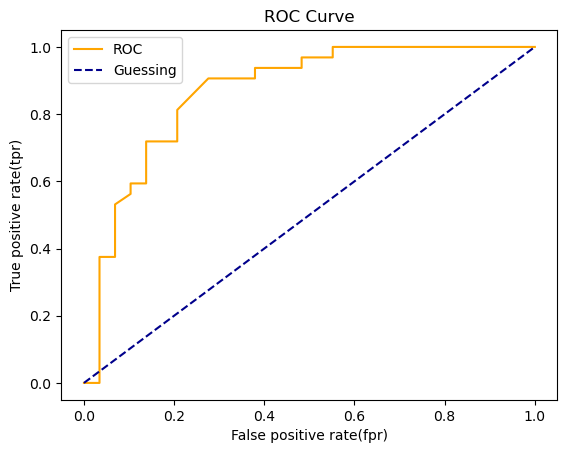

In [92]:
# Create a function for plotting ROC curve
import matplotlib.pyplot as plt

def plot_roc_curves(fr,tr):
    """
    Plots a ROC curve given the fpr and tpr
    """
    # Plot Roc curve
    plt.plot(fr,tr,color="orange",label="ROC")
    #Plor lone with no Predictive power (baseline)
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='Guessing')
    # Customize plot
    plt.xlabel('False positive rate(fpr)')
    plt.ylabel('True positive rate(tpr)')
    plt.title ('ROC Curve')
    plt.legend()
    plt.show()

plot_roc_curves(fpr,tpr)


In [93]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test,y_probs_positive)

0.8669181034482759

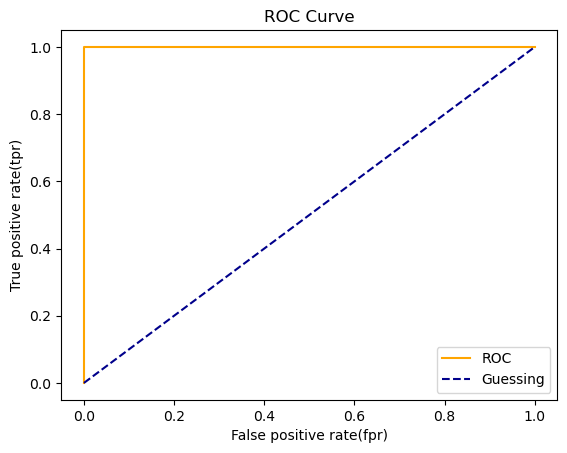

In [94]:
# plot perfect roc curve 
fpr, tpr, thresholds=roc_curve(y_test,y_test)
plot_roc_curves(fpr,tpr)

In [95]:
# Pefect Auc Score
roc_auc_score(y_test,y_test)

1.0

#### Confusion Matrix

A Confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict

In essence, giving you the idea of where the model is getting confused

In [96]:
from sklearn.metrics import confusion_matrix

y_preds=model.predict(x_test)

confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]], dtype=int64)

In [97]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,y_preds,rownames=["Actual Names"],colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Names,,
0,23,6
1,6,26


In [98]:
# Make  our confusion matrix more visual with Seaborn's heatmap (Visualization library built on top of matplotlib)
## Wel will have to install seaborn because it is not a part of our environemt

# How to install a conda package in a jupyter notebook into the current environment 
import sys
!conda install --yes --prefix {sys.prefix} seaborn


Retrieving notices: ...working... done
Channels:
 - defaults
Platform: win-64
Solving environment: ...working... done

# All requested packages already installed.



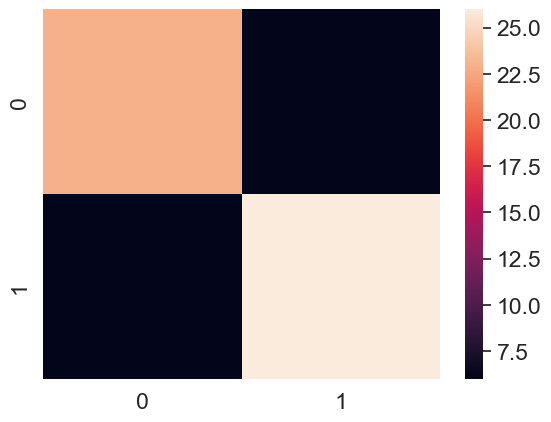

In [99]:
# Import Seaborn
import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion Matrix
conf_max=confusion_matrix(y_test,y_preds)

# Plot it using Seaborn
sns.heatmap(conf_max);

In [100]:
###Creating a confusion matrix using Scikit Learn
# Make sure version 1.0+
import sklearn
sklearn.__version__


'1.5.1'

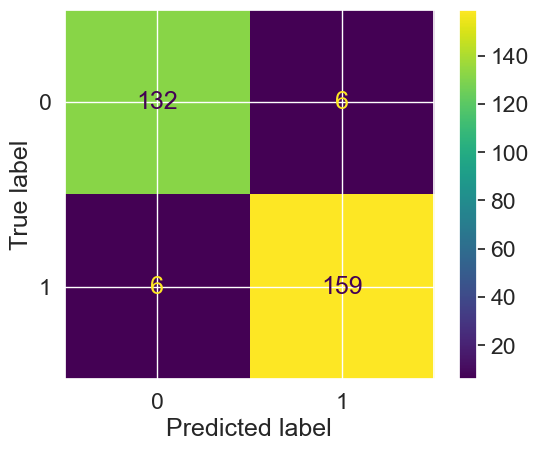

In [101]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=model,X=x,y=y)

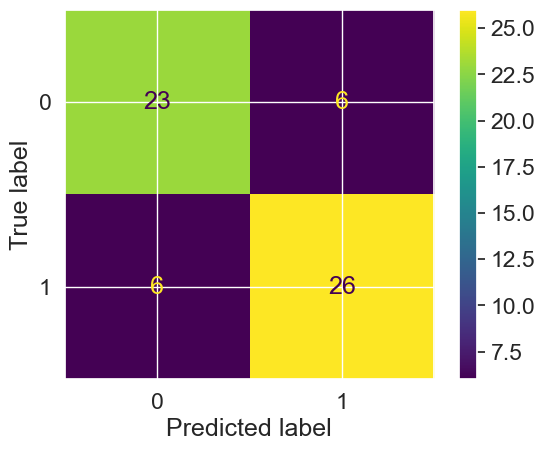

In [102]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=y_preds)

#### Classification Report

In [103]:
from sklearn.metrics import classification_report

In [104]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [105]:
# Where precison and recall become valueable
disease_true=np.zeros(10000)
disease_true[0]=1 # only one positive case

disease_preds=np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

C:\Users\lenovo\Desktop\sample_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lenovo\Desktop\sample_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\lenovo\Desktop\sample_project\env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


 To summarize Classification Metrics:
 * Accuracy is a good measure to start with if all classes are (eg. same amount of samples which are labelled with 0 or 1)
 * Precision and Recall become more important when the classes are imbalanced
 * If false positive predictions are worse than false negatives, aim for a higher precision.
 * If false negative predictions are worse than false positive predictions, aim for a higher recall
 * F1-score is a combination of precision and recall. 

#### 4.2.2 Regression model evaluation metrics

Model Evaluation metrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

The ones we are going to cover:
1. R^2 (pronounced r-squared) or coefficient of determination
2. Mean Absolute Error(MAE)
3. Mean Squared Error(MSE)

In [106]:
#Import the data
from sklearn.ensemble import RandomForestRegressor

#Setup Random seed
np.random.seed(41)

# Create the data
x=housing_df.drop("target",axis=1)
y=housing_df["target"]

#Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Instantiate and fit the model
model=RandomForestRegressor()
model.fit(x_train,y_train)

#check model on test set

model.score(x_test,y_test)

0.8101560950661048

**R^2**

What R-squared does: Compares your model predictions to the mean of the targets, Values can range from negative infinity (very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 Value would be 0, and if your model perfectly predicts a range of numbers its R^2 value would be 1

In [107]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean=np.full(len(y_test),y_test.mean())

# Check the aaray
y_test_mean[:10]

array([2.04316881, 2.04316881, 2.04316881, 2.04316881, 2.04316881,
       2.04316881, 2.04316881, 2.04316881, 2.04316881, 2.04316881])

In [108]:
r2_score(y_true=y_test, y_pred= y_test_mean)

0.0

In [111]:
r2_score(y_true=y_test,y_pred=y_test)

1.0

In [112]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [113]:
#Setup Random seed
np.random.seed(41)

# Create the data
x=housing_df.drop("target",axis=1)
y=housing_df["target"]

#Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Instantiate and fit the model
model=RandomForestRegressor()
model.fit(x_train,y_train)

#check model on test set

model.score(x_test,y_test)


0.8101560950661048

**Mean absolute error (MAE)**

MAE is the average betwwen predictions and actual values

It gives you an idea of how wrong your model predictions are

In [118]:
y_preds=model.predict(x_test)
mae=mean_absolute_error(y_test,y_preds)
mae

0.3221156207364343

In [119]:
df=pd.DataFrame(data={"actual values":y_test,
                      "predicted values":y_preds})
df["differences"]=df["predicted values"]-df["actual values"]
df.head(10)

,actual values,predicted values,differences
12054,1.194,1.108430,-0.085570
14079,1.670,3.757132,2.087132
7423,1.593,1.604960,0.011960
7100,2.028,2.215580,0.187580
12628,0.703,0.913420,0.210420
250,1.191,1.273590,0.082590
1327,1.818,1.325010,-0.492990
14163,1.618,1.191450,-0.426550
12288,0.898,1.165190,0.267190
11278,2.218,2.365870,0.147870


In [120]:
df["differences"].mean()

0.021981557364340668

Value is different because now it takes the negative into account

In [123]:
# MAE using the formula and the differences
np.abs(df["differences"]).mean()

0.3221156207364343

Once the values is absolute the result is the same

**Mean squared error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values

In [125]:
# MSE
y_preds=model.predict(x_test)
mse=mean_squared_error(y_test,y_preds)
mse


0.24969393684438426

Its less than MAE, Lets see why

In [127]:
df["squared differences"]=np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared differences
12054,1.194,1.108430,-0.085570,0.007322
14079,1.670,3.757132,2.087132,4.356121
7423,1.593,1.604960,0.011960,0.000143
7100,2.028,2.215580,0.187580,0.035186
12628,0.703,0.913420,0.210420,0.044277


In [128]:
# Calculate MSE by hand
squared=np.square(df["differences"])
squared.mean()

0.24969393684438426

In [129]:
df_large_error=df.copy()
df_large_error.iloc[0]["squared differences"]=16
df_large_error

C:\Users\lenovo\AppData\Local\Temp\ipykernel_2308\2161912044.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_large_error.iloc[0]["squared differences"]=16


,actual values,predicted values,differences,squared differences
12054,1.19400,1.108430,-0.085570,16.000000
14079,1.67000,3.757132,2.087132,4.356121
7423,1.59300,1.604960,0.011960,0.000143
7100,2.02800,2.215580,0.187580,0.035186
12628,0.70300,0.913420,0.210420,0.044277
...,...,...,...,...
12923,1.57700,1.351530,-0.225470,0.050837
4801,1.20000,1.470900,0.270900,0.073387
12438,0.67500,0.745310,0.070310,0.004943
8887,5.00001,4.586046,-0.413964,0.171366


In [134]:
# Calculate MSE with edited data
df_large_error["squared differences"].mean()

0.25356813204184064

In [135]:
df_large_error.iloc[1:100]=20
df_large_error

,actual values,predicted values,differences,squared differences
12054,1.19400,1.108430,-0.085570,16.000000
14079,20.00000,20.000000,20.000000,20.000000
7423,20.00000,20.000000,20.000000,20.000000
7100,20.00000,20.000000,20.000000,20.000000
12628,20.00000,20.000000,20.000000,20.000000
...,...,...,...,...
12923,1.57700,1.351530,-0.225470,0.050837
4801,1.20000,1.470900,0.270900,0.073387
12438,0.67500,0.745310,0.070310,0.004943
8887,5.00001,4.586046,-0.413964,0.171366


In [136]:
df_large_error["squared differences"].mean()

0.7266619969215724

Now we see a difference

SO IN TOTAL

**Machine Learning Model Evaluation**

Evaluating the results of a machine learning model is as important as building one.

But just like how different problems have different machine learning models, different machine learning models have different evaluation metrics.

Below are some of the most important evaluation metrics you'll want to look into for classification and regression models.

Classification Model Evaluation Metrics/Techniques

Accuracy - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.

Precision - Indicates the proportion of positive identifications (model predicted class 1) which were actually correct. A model which produces no false positives has a precision of 1.0.

Recall - Indicates the proportion of actual positives which were correctly classified. A model which produces no false negatives has a recall of 1.0.

F1 score - A combination of precision and recall. A perfect model achieves an F1 score of 1.0.

Confusion matrix - Compares the predicted values with the true values in a tabular way, if 100% correct, all values in the matrix will be top left to bottom right (diagonal line).

Cross-validation - Splits your dataset into multiple parts and train and tests your model on each part then evaluates performance as an average.

Classification report - Sklearn has a built-in function called classification_report() which returns some of the main classification metrics such as precision, recall and f1-score.

ROC Curve - Also known as receiver operating characteristic is a plot of true positive rate versus false-positive rate.

Area Under Curve (AUC) Score - The area underneath the ROC curve. A perfect model achieves an AUC score of 1.0.

Which classification metric should you use?

Accuracy is a good measure to start with if all classes are balanced (e.g. same amount of samples which are labelled with 0 or 1).

Precision and recall become more important when classes are imbalanced.

If false-positive predictions are worse than false-negatives, aim for higher precision.

If false-negative predictions are worse than false-positives, aim for higher recall.

F1-score is a combination of precision and recall.

A confusion matrix is always a good way to visualize how a classification model is going.

Regression Model Evaluation Metrics/Techniques

R^2 (pronounced r-squared) or the coefficient of determination - Compares your model's predictions to the mean of the targets. Values can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, its R^2 value would be 0. And if your model perfectly predicts a range of numbers it's R^2 value would be 1.

Mean absolute error (MAE) - The average of the absolute differences between predictions and actual values. It gives you an idea of how wrong your predictions were.

Mean squared error (MSE) - The average squared differences between predictions and actual values. Squaring the errors removes negative errors. It also amplifies outliers (samples which have larger errors).

Which regression metric should you use?

R2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R2 value is to 1.0, the better the model. But it doesn't really tell exactly how wrong your model is in terms of how far off each prediction is.

MAE gives a better indication of how far off each of your model's predictions are on average.

As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we're predicting the value of houses (which we are).

Pay more attention to MAE: When being 10,000 off is twice as bad as being $5,000 off.

Pay more attention to MSE: When being 10,000 off is more than twice as bad as being $5,000 off.

#### 4.2.3 Using the `scoring` parameter

In [137]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

#Setup Random seed
np.random.seed(42)

# Create the data
x=heart_disease_df.drop("target",axis=1)
y=heart_disease_df["target"]

model=RandomForestClassifier()

In [138]:
np.random.seed(42)

# Cross validation accuracy
cv_acc= cross_val_score(model,x,y,cv=5,scoring=None)  #if scoring is none then estimator's default scoring evaluation is used (accuracy)

In [139]:
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [140]:
# Cross validated accuracy
print(f"The cross validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross validated accuracy is: 82.48%


In [141]:
np.random.seed(42)

cv_acc= cross_val_score(model,x,y,cv=5,scoring="accuracy")

In [142]:
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

If we use None it uses accuracy for a classifier

In [144]:
# Precision
np.random.seed(42)
cv_precision=cv_acc= cross_val_score(model,x,y,cv=5,scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [146]:
print(f"The cross validated precison is: {np.mean(cv_precision)}")

The cross validated precison is: 0.8329547346025924


In [147]:
# Recall
np.random.seed(42)
cv_recall=cross_val_score(model,x,y,cv=5,scoring="recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [149]:
print(f"The cross validated recall is: {np.mean(cv_recall)}")

The cross validated recall is: 0.8545454545454545


Lets see the `scoring` parameter being used for Regression Model

In [151]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(41)

# Create the data
x=housing_df.drop("target",axis=1)
y=housing_df["target"]

#Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Instantiate and fit the model
model=RandomForestRegressor()

In [153]:
np.random.seed(41)
cv_r2= cross_val_score(model,x,y,cv=3,scoring=None) # R2 is default scoring for a regression model
np.mean(cv_r2)

0.654688763344982

In [154]:
# Mean Absolute Error
cv_mae=cross_val_score(model,x,y,cv=3,scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-0.48155422818798455

In [158]:
# Mean Squared Error 
cv_mse=cross_val_score(model,x,y,cv=3,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.46213705330796806

In [159]:
cv_mse

array([-0.51151097, -0.33039928, -0.54450091])

In [160]:
cv_mae

array([-0.51964385, -0.42321849, -0.50180034])

#### 4.3 Using different evaluation Metrics as Sklearn Functions

The 3rd way to evaluate scikit-learn machine learning model/estimator is to use the `sklearn.metrics` module-https://scikit-learn.org/stable/api/sklearn.metrics.html#module-sklearn.metrics

In [169]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)

# Create x and y
x=heart_disease_df.drop("target",axis=1)
y=heart_disease_df["target"]

# Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Create model
model= RandomForestClassifier()

# Fit the model
model.fit(x_train,y_train)

# Make Predictions
y_preds=model.predict(x_test)

#Evaluate model using evaluation functions
print ("Classifier Metrics on test set")
print(f"Accuracy: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test,y_preds)}")
print(f"Recall: {recall_score(y_test,y_preds)}")
print(f"F1 Score: {f1_score(y_test,y_preds)}")

Classifier Metrics on test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1 Score: 0.8615384615384616


In [170]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(41)
# Create x and y
x=housing_df.drop("target",axis=1)
y=housing_df["target"]

# Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Create model
model= RandomForestRegressor()

# Fit the model
model.fit(x_train,y_train)

# Make Predictions
y_preds=model.predict(x_test)

#Evaluate model using evaluation functions
print ("Regressor Metrics on test set")
print(f"R2 Score: {r2_score(y_test,y_preds)}")
print(f"Precision: {mean_absolute_error(y_test,y_preds)}")
print(f"Recall: {mean_squared_error(y_test,y_preds)}")

Regressor Metrics on test set
R2 Score: 0.8101560950661048
Precision: 0.3221156207364343
Recall: 0.24969393684438426


### 5. Improving a model

First Predictions= baseline prediction
First Model=baseline model

From a data perspective:
* Could we collect more data? (generally, the more data, the better)
* Could we improve our data? (more information about each sample)

From a model perspective:
* Could we use a better model?
* Could we improve the current model?

Hyperparameters vs Parameter
* Parameter= model finds these patterns in the data
* Hyperparameters= Settings on a model you can adjust to potentially improve its ability to find patterns

3 ways to adjust Hyperparameters
* By hand
* Randomly with RandomSeachCV
* Exhaustively with GridSearchCV

In [171]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier()

In [174]:
model.get_params() # Get hyperparameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

#### 5.1 Tuning Hyperpaarmeters by hand

Hyperparameters get tuned on the validation set

Lets make 3 sets training, validation, test.

In [175]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We are going to try and adjust the following:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_sample_split`
* `n_estimators`

In [185]:
def evaluate_preds(y_true,y_preds):
    '''
    Performs evaluations comparison on y_true labels vs y_preds labels
    '''
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict={"accuracy":round(accuracy,2),
                 "precision":round(precision,2),
                 "recall":round(recall,2),
                 "f1_score":round(f1,2)}
    print(f"Accuracy:{accuracy*100:.2f}%")
    print(f"Precision:{precision:.2f}")
    print(f"Recall:{recall:.2f}")
    print(f"F1 Score:{f1:.2f}")

    return metric_dict

In [206]:
# Split data into training, validation and test
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled=heart_disease.sample(frac=1)

# Create x,y
x= heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

# Split into training,validation and test
train_split = round(0.7*len(heart_disease_shuffled)) # 70% of our data
validation_split= round(train_split+0.15*len(heart_disease_shuffled)) # 15% of our data
x_train,y_train=x[:train_split],y[:train_split]
x_valid,y_valid=x[train_split:validation_split],y[train_split:validation_split]
x_test,y_test=x[validation_split:],y[validation_split:]

model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [207]:
# Make baseline Predictions
y_preds=model.predict(x_valid)

# Evaluate the classifier on valid set
baseline_metric=evaluate_preds(y_valid,y_preds)
baseline_metric

Accuracy:82.22%
Precision:0.81
Recall:0.88
F1 Score:0.85


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1_score': 0.85}

In [208]:
np.random.seed(42)

# Create a second classifier with different Hyperparameters
model_2=RandomForestClassifier(n_estimators=100)
model_2.fit(x_train,y_train)

# Make Predictions with different hyperparameters
y_preds_2=model_2.predict(x_valid)

# Evaluate the 2nd Classifier
model_2_metrics=evaluate_preds(y_valid,y_preds_2)

Accuracy:82.22%
Precision:0.84
Recall:0.84
F1 Score:0.84


#### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [217]:
from sklearn.model_selection import RandomizedSearchCV

grid={'n_estimators':[10,100,200,500,1000,1200],
      'max_depth':[None,5,10,20,30],
      'max_features':['auto','sqrt'],
      'min_samples_split':[2,4,6],
      'min_samples_leaf':[1,2,4]}

np.random.seed(42)

#Split into x,y
x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

# Split into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Instantiate the model
model=RandomForestClassifier(n_jobs=1)

# Setup randomizedsearchcv
rs_model=RandomizedSearchCV(estimator=model,
                           param_distributions=grid,
                           n_iter=50, #number of models to try
                           cv=5,
                           verbose=2)

# Fit the RandomizedSearchCV version of model
rs_model.fit(x_train,y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   1.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10

C:\Users\lenovo\Desktop\sample_project\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
150 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lenovo\Desktop\sample_project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lenovo\Desktop\sample_project\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\lenovo\Desktop\sample_project\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate

In [220]:
rs_model.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [222]:
# Make predictions with the best hyperparameter (it chooses the best params by default)
rs_y_preds=rs_model.predict(x_test)

# Evaluate the predictions
rs_metrics=evaluate_preds(y_test,rs_y_preds)

Accuracy:83.61%
Precision:0.78
Recall:0.89
F1 Score:0.83


There wasnt any improve so thats where we can change iterations and see if we see a bosst, this is completelt experimental

edit: after running with 50 iterations instead of 10 we see an improvement

#### 5.3 Hyperparamter tuning with GridSearchCV

GridsearchCV goes through every iteration instead of limiting it to 10 or 50, this the difference between RSCV and GSCV

In [223]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [224]:
# This will run about 2700 different times which isnt suitable for a normal pc so we will createa new grid

#We will change the grid using the best params from RSCV
grid_2={'n_estimators': [100, 200, 500],
        'max_depth': [None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [6],
        'min_samples_leaf': [1, 2]}

# We have reduced our search space now, now it will have 60 iterations intead of 2700


In [226]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

#Split into x,y
x=heart_disease_shuffled.drop("target",axis=1)
y=heart_disease_shuffled["target"]

# Split into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#Instantiate the model
model=RandomForestClassifier(n_jobs=1)

# Setup gridsearchcv
gs_model=GridSearchCV(estimator=model,
                           param_grid=grid_2,
                           cv=5,
                           verbose=2)

# Fit the GridSearchCV version of model
gs_model.fit(x_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

C:\Users\lenovo\Desktop\sample_project\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lenovo\Desktop\sample_project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lenovo\Desktop\sample_project\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\lenovo\Desktop\sample_project\env\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_pa

In [227]:
gs_model.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 100}

In [228]:
# Make predictions with the best hyperparameter (it chooses the best params by default)
gs_y_preds=gs_model.predict(x_test)

# Evaluate the predictions
gs_metrics=evaluate_preds(y_test,gs_y_preds)

Accuracy:81.97%
Precision:0.77
Recall:0.86
F1 Score:0.81


We again see a dip in accuracy so we can repeat the process and try and figure out the hyperparameters

Lets compare our different model metrics

<Axes: >

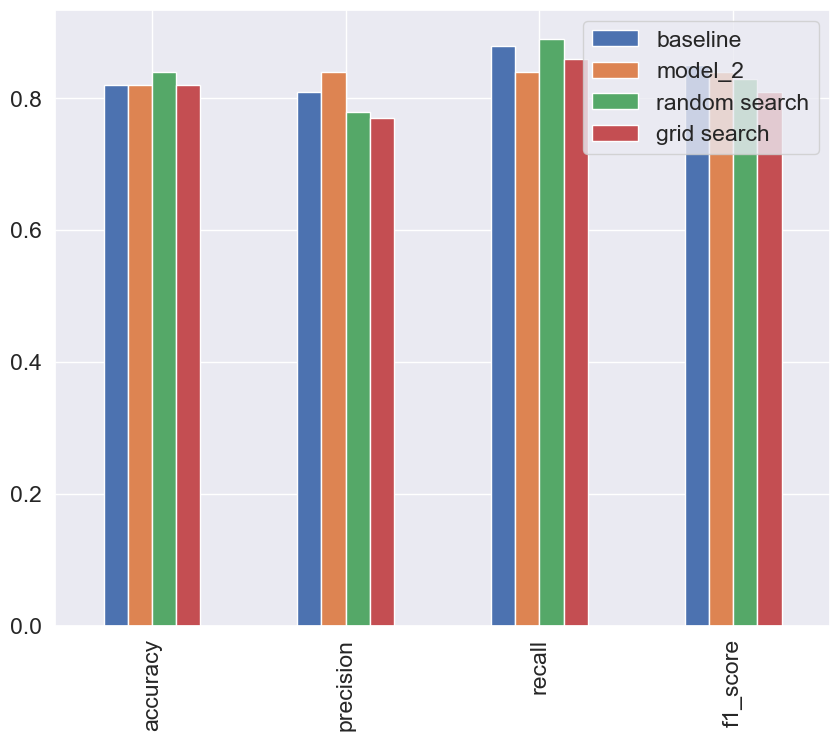

In [232]:
compare_metrics=pd.DataFrame({"baseline":baseline_metric,
                              "model_2":model_2_metrics,
                              "random search":rs_metrics,
                              "grid search":gs_metrics})
compare_metrics.plot.bar(figsize=(10,8))

## 6. Save and load a trained model

Two ways to save
1. With Python's `pickle` module
2. With the `joblib` module

**Pickle**

In [234]:
import pickle

# Save a model
pickle.dump(rs_model,open("MODEL 1.pkl","wb"))

In [235]:
# Load a saved model
loaded_pickle_model=pickle.load(open("MODEL 1.pkl","rb"))

In [236]:
# Make some predictions
preds=loaded_pickle_model.predict(x_test)
evaluate_preds(y_test,preds)

Accuracy:83.61%
Precision:0.78
Recall:0.89
F1 Score:0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1_score': 0.83}

**Joblib**

In [238]:
from joblib import dump,load

# Save model to file
dump(rs_model,filename="Model 1.joblib")

['Model 1.joblib']

In [239]:
# Load a joblib model
load_model=load(filename="Model 1.joblib")

In [241]:
# Make and evaluate predictions
preds=load_model.predict(x_test)
evaluate_preds(y_test,preds)

Accuracy:83.61%
Precision:0.78
Recall:0.89
F1 Score:0.83


{'accuracy': 0.84, 'precision': 0.78, 'recall': 0.89, 'f1_score': 0.83}

## 7. Putting it all together

In [242]:
data=pd.read_csv("car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [243]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to to do (All in one cell):
1. Fill missing data
2. Convert data to numbers
3. Built a model 

In [251]:
# Getting data ready
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#Setup Seed
import numpy as np
np.random.seed(42)

# Import data 
data=pd.read_csv("car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipeline
categorical_features=["Make",'Colour']
categorical_transformer=Pipeline(steps=[("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
                                        ("onehot",OneHotEncoder(handle_unknown="ignore"))])

door_feature= ["Doors"]
door_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy="constant",fill_value=4))])

numeric_features=["Odometer (KM)"]
numeric_transformer=Pipeline(steps=[("imputer",SimpleImputer(strategy="mean"))])

# Setup Preprocessing steps(Fill missing values and fill with number)
preprocessor=ColumnTransformer(transformers=[("cat",categorical_transformer,categorical_features),
                                             ("door",door_transformer,door_feature),
                                             ("num",numeric_transformer,numeric_features)])

# Creating a preprocessing and modelling Pipeline
model= Pipeline(steps=[("preprocessor",preprocessor),
                       ("model",RandomForestRegressor())])

# Split Data
x=data.drop("Price",axis=1)
y=data["Price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

# Fit and Score the model
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.22188417408787875

Its also possible to use `GridSearchCV` and `RandomizedSearchCV` with our `Pipeline`

In [253]:
# Use GSCV
from sklearn.model_selection import GridSearchCV

pipe_grid={"preprocessor__num__imputer__strategy":["mean","median"],
           "model__n_estimators":[100,1000],
           "model__max_depth":[None,5],
           "model__max_features":["sqrt"],
           "model__min_samples_split":[2,4]}

gs_model=GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.1s
[CV] END model__max_depth=None, model__max_features=sqrt, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value=4,
                                                                                                        strategy='constant'))]),
                                                                         ['Doors']),
                                                                        ('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         ['Odometer '
                                                                          '(KM)'])])),
                                       ('model', RandomForestRegressor())]),
             param_grid={'model__max_depth': [None, 5],
                         'model__max_features': ['sqrt'],
                         'model__min_samples_split': [2, 4],
                         'model__n_estimators': [100, 1000],
                         'preprocessor__num__imputer__strategy': ['mean',
                                                                  'median']},
             verbose=2)

In [254]:
gs_model.score(x_test,y_test)

0.2848784564026805

# THE END